In [1]:
import sys 
sys.executable

'C:\\Users\\Changho_Notebook\\anaconda3\\python.exe'

In [2]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


ModuleNotFoundError: No module named 'tensorflow'

In [101]:
data = pd.read_csv('./data/test_data0410.csv', encoding = 'euc-kr')

In [102]:
data

Text  Feeling  Talking  \
0     ‘인도’가 적에게 포위를 당했는데, 적들이 은화 6백 개를 내놓을 때까지 물러나지 ...      2.0      NaN   
1                                 그래서 주민들이 북을 치며 선포하길,       2.0      NaN   
2                          *누구든 그 돈을 마련하는 사람을 시장으로 삼겠다*      2.0      1.0   
3                                               라고 했답니다      0.0      NaN   
4     때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다, 그 적들이 들...      5.0      NaN   
...                                                 ...      ...      ...   
6378    어떻게 하면 될까? 뭘 먹거나 마시면 될 것도 같은데, 여기서 질문, 그럼 뭘 먹지*      5.0      0.0   
6379  그 질문이 너무도 확고했어요, 대체 뭘 먹어야하냐고요?앨리스는 주변의 꽃들과 잔디의...      5.0      0.0   
6380  그나마 다행인건 그녀 가까이에 그녀의 키만큼 커다란 버섯 한 송이가 자라고 있어, ...      5.0      0.0   
6381                     그녀가 발끝을 들어 버섯 끄트머리 위쪽을 들여다보았어요      5.0      0.0   
6382   그 순간 그녀의 눈이 양 팔을 접은 채 기다란 물담뱃대를 조용히 피우며 세상 태평...      5.0      0.0   

      book_id  sentence_id  
0        5001          1.0  
1        5001          2.0  
2        5001          3.0  
3        5001          4.0  
4        5001          5.0  
...       ...          ...  
6378     2001        677.0  
6379     2001        678.0  
6380     2001        679.0  
6381     2001        680.0  
6382     2001        681.0  

[6383 rows x 5 columns]

In [103]:
print(len(data))

6383


In [104]:
data = data.iloc[:,:2]

In [105]:
data

Text  Feeling
0     ‘인도’가 적에게 포위를 당했는데, 적들이 은화 6백 개를 내놓을 때까지 물러나지 ...      2.0
1                                 그래서 주민들이 북을 치며 선포하길,       2.0
2                          *누구든 그 돈을 마련하는 사람을 시장으로 삼겠다*      2.0
3                                               라고 했답니다      0.0
4     때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다, 그 적들이 들...      5.0
...                                                 ...      ...
6378    어떻게 하면 될까? 뭘 먹거나 마시면 될 것도 같은데, 여기서 질문, 그럼 뭘 먹지*      5.0
6379  그 질문이 너무도 확고했어요, 대체 뭘 먹어야하냐고요?앨리스는 주변의 꽃들과 잔디의...      5.0
6380  그나마 다행인건 그녀 가까이에 그녀의 키만큼 커다란 버섯 한 송이가 자라고 있어, ...      5.0
6381                     그녀가 발끝을 들어 버섯 끄트머리 위쪽을 들여다보았어요      5.0
6382   그 순간 그녀의 눈이 양 팔을 접은 채 기다란 물담뱃대를 조용히 피우며 세상 태평...      5.0

[6383 rows x 2 columns]

In [106]:
data['Text'].nunique(), data['Feeling'].nunique()

(6166, 7)

In [107]:
display(data[data.duplicated()])

Text  Feeling
54                 라고 말했어요      0.0
172   *젬지 산아, 젬지 산아, 열리거라*      2.0
215             라고 그가 말했어요      0.0
316           라며 당나귀가 말했어요      0.0
325             라며 그가 말했어요      0.0
...                    ...      ...
6049                 *그렇담*      5.0
6084           라며 생쥐가 말했어요      0.0
6092          라며 도도새가 말했어요      0.0
6107          라며 앨리스가 말했어요      0.0
6309             *빌이 날아간다*      5.0

[168 rows x 2 columns]

In [108]:
data['Feeling'].value_counts()

5.0     2421
2.0     1936
0.0      786
1.0      583
3.0      354
4.0      300
22.0       1
Name: Feeling, dtype: int64

In [109]:
data = data[data["Feeling"] != 22.0]

In [110]:
data['Feeling'].value_counts()

5.0    2421
2.0    1936
0.0     786
1.0     583
3.0     354
4.0     300
Name: Feeling, dtype: int64

<AxesSubplot:>

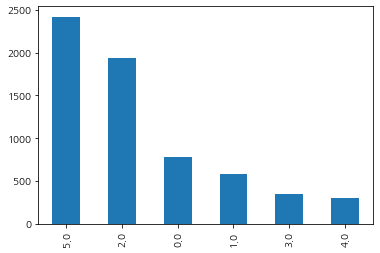

In [111]:
data['Feeling'].value_counts().plot(kind='bar')

In [112]:
#  결측치 제거

In [113]:
data.isnull().sum()

Text       0
Feeling    2
dtype: int64

In [114]:
data = data.dropna(how = 'any')
print(data.isnull().values.any())

False


In [115]:
data = data.astype({"Feeling" : 'int64'})
data['Feeling']

0       2
1       2
2       2
3       0
4       5
       ..
6378    5
6379    5
6380    5
6381    5
6382    5
Name: Feeling, Length: 6380, dtype: int64

In [116]:
# 한글만 남기기 

data['Text'] = data['Text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data

Text  Feeling
0     인도가 적에게 포위를 당했는데 적들이 은화 백 개를 내놓을 때까지 물러나지 않겠다고...        2
1                                  그래서 주민들이 북을 치며 선포하길         2
2                            누구든 그 돈을 마련하는 사람을 시장으로 삼겠다        2
3                                               라고 했답니다        0
4     때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다 그 적들이 들이...        5
...                                                 ...      ...
6378        어떻게 하면 될까 뭘 먹거나 마시면 될 것도 같은데 여기서 질문 그럼 뭘 먹지        5
6379  그 질문이 너무도 확고했어요 대체 뭘 먹어야하냐고요앨리스는 주변의 꽃들과 잔디의 풀...        5
6380  그나마 다행인건 그녀 가까이에 그녀의 키만큼 커다란 버섯 한 송이가 자라고 있어 그...        5
6381                     그녀가 발끝을 들어 버섯 끄트머리 위쪽을 들여다보았어요        5
6382   그 순간 그녀의 눈이 양 팔을 접은 채 기다란 물담뱃대를 조용히 피우며 세상 태평...        5

[6380 rows x 2 columns]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], 
                                                    data['Feeling'], 
                                                    test_size=0.1, 
                                                    random_state=1004)

In [118]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

3759     그와 동시에 여자마법사가 오더니 아이에게 라푼첼이라는 이름을 지어주고는 아이를 데...
2405              으리으리한 성으로 돌아온 다음 왕은 그녀에게 아름다운 의상들을 입혔어요
1183               저희는 밤늦도록 이야기꽃을 피우다 그 낯선 이에게 방을 안내해주었지요
4502              주방장은 뒤뜰로 가 어린 양을 죽이고 근사하고 맛있는 양념으로 덮었어요
4826                                      라는 말밖에 할 수가 없었죠
                              ...                        
6070                                  모두가 우승자야 모두 상을 받아야해
1265    그들은 그 꿀단지를 침실 벽에 고정된 선반 위에 두고 누가 훔쳐가지 않나 또는 생쥐...
5448                 처음엔 이 요구가 힘이 들어 그저 왕은 새로운 눈물을 젖서야 했다
4130                             아아 제 엄마가 저를 문 밖으로 쫓아내셨어요
2574                                그럼 등골이 오싹한 걸 배우게 될 테니
Name: Text, Length: 5742, dtype: object
1455                  정 그렇다면 공주님이 직접 오시면 제가 믿고 한 마리를 드리지요
5228                                            젠장 그게 있었군
2111                                네가 가지고 싶은 건 다 착한 개구리야
1897    그물을 아래에 설치한 다음 돌출된 바위 위에 선 어부는 물고기들이 내 멜로디에 이끌...
4590    그 즉시 자고새들이 자루 속으로 뛰어들었고 그러자 마자 장화 신은 고양이가 끈을 동...
                              ..

In [119]:
# 토큰화

In [120]:
# 추후 늘리기
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [121]:
okt = Okt()
X_trains = []
for sentence in X_train:
    temp_X = okt.morphs(sentence, stem = True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    X_trains.append(temp_X)

In [122]:
okt = Okt()
X_tests = []
for sentence in X_test:
    temp_X = okt.morphs(sentence, stem = True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    X_tests.append(temp_X)

In [123]:
X_train = X_trains
X_test = X_tests

In [124]:
print(X_train[:3])
print(X_test[:3])

[['그', '동시', '여자', '마법사', '오다', '아이', '에게', '라푼첼', '이라는', '이름', '을', '지다', '아이', '데리', '고', '가버리다'], ['으리', '으리', '성', '돌아오다', '다음', '왕', '그녀', '에게', '아름답다', '의상', '을', '입히다'], ['저희', '밤늦다', '이야기', '꽃', '을', '피우다', '그', '낯선', '에게', '방', '을', '안내', '해주다']]
[['정', '그렇다', '공주', '님', '직접', '오시', '면', '제', '믿다', '마리', '드리다'], ['젠장', '그게', '있다'], ['네', '가지', '고', '싶다', '건', '다', '착하다', '개구리', '야']]


In [125]:
# 정수 인코딩
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

In [126]:
print(tokenizer.word_index)

{'을': 1, '그': 2, '말': 3, '있다': 4, '로': 5, '그녀': 6, '그렇다': 7, '보다': 8, '에게': 9, '않다': 10, '라며': 11, '자신': 12, '없다': 13, '이다': 14, '왕': 15, '에서': 16, '것': 17, '내': 18, '게': 19, '가다': 20, '수': 21, '되다': 22, '고': 23, '거': 24, '하지만': 25, '들다': 26, '님': 27, '공주': 28, '다음': 29, '그래서': 30, '다': 31, '요': 32, '더': 33, '저': 34, '네': 35, '제': 36, '말다': 37, '왕자': 38, '오다': 39, '하나': 40, '두': 41, '때': 42, '예요': 43, '되어다': 44, '안': 45, '다시': 46, '만': 47, '생각': 48, '아이': 49, '사람': 50, '못': 51, '걸': 52, '왕비': 53, '크다': 54, '엄마': 55, '뭐': 56, '아니다': 57, '집': 58, '라고': 59, '먹다': 60, '엔': 61, '하고': 62, '소리': 63, '아': 64, '당신': 65, '나': 66, '한스': 67, '날': 68, '청년': 69, '앨리스': 70, '속': 71, '버리다': 72, '자다': 73, '아내': 74, '까지': 75, '지': 76, '모두': 77, '숲': 78, '모든': 79, '그리고': 80, '그러자': 81, '소녀': 82, '눈': 83, '때문': 84, '해주다': 85, '문': 86, '대답': 87, '고양이': 88, '우리': 89, '같다': 90, '인': 91, '이제': 92, '죠': 93, '좋다': 94, '시작': 95, '앉다': 96, '마리': 97, '주다': 98, '손': 99, '위': 100, '받다': 101, '나오다': 102, '난': 103, '어

In [127]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5958
등장 빈도가 2번 이하인 희귀 단어의 수: 3188
단어 집합에서 희귀 단어의 비율: 53.507888553205774
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.637089041652447


In [128]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2771


In [130]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [131]:
print(X_train[:3])

[[2, 686, 194, 422, 39, 49, 9, 392, 1629, 343, 1, 376, 49, 344, 23, 720], [270, 151, 29, 15, 6, 9, 108, 652, 1, 1278], [1032, 2244, 1418, 484, 1, 1033, 2, 1419, 9, 130, 1, 85]]


In [132]:
# 빈 샘플 제거 
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_train2 = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [133]:
print(len(X_train))
y_train = list(y_train)
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

5742
5727
5727


/home/jupyter/anaconda3/envs/book/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [134]:
y_test = list(y_test)
X_test = np.delete(X_test, drop_train2, axis=0)
y_test = np.delete(y_test, drop_train2, axis=0)
print(len(X_test))
print(len(y_test))

633
633


리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 10.031255456609045


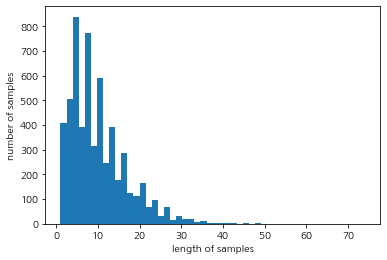

In [135]:
# 패딩
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [136]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [137]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 98.48088004190676


In [138]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [139]:
# y(결과값) 라벨링
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [140]:
# 모델 시작 (LSTM)

In [141]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [142]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(256)))
# model.add(Dense(256, activation = 'relu'))
model.add(Dense(6,activation = 'softmax'))

In [143]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [144]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)
# history = model.fit(X_train, y_train, epochs=15, callbacks=[mc], batch_size=60, validation_split=0.2)

Epoch 1/15
77/77 [==============================] - 9s 84ms/step - loss: 1.5478 - acc: 0.3607 - val_loss: 1.3846 - val_acc: 0.4311

Epoch 00001: val_acc improved from -inf to 0.43106, saving model to best_model.h5
Epoch 2/15
77/77 [==============================] - 6s 72ms/step - loss: 1.3420 - acc: 0.4469 - val_loss: 1.2996 - val_acc: 0.4756

Epoch 00002: val_acc improved from 0.43106 to 0.47557, saving model to best_model.h5
Epoch 3/15
77/77 [==============================] - 6s 72ms/step - loss: 1.1974 - acc: 0.5227 - val_loss: 1.2630 - val_acc: 0.5026

Epoch 00003: val_acc improved from 0.47557 to 0.50262, saving model to best_model.h5
Epoch 4/15
77/77 [==============================] - 6s 72ms/step - loss: 0.9292 - acc: 0.6423 - val_loss: 1.3639 - val_acc: 0.4869

Epoch 00004: val_acc did not improve from 0.50262
Epoch 5/15
77/77 [==============================] - 6s 72ms/step - loss: 0.7576 - acc: 0.7294 - val_loss: 1.4588 - val_acc: 0.4764

Epoch 00005: val_acc did not improve f

- LSTM 256
    - adam -> 0.4939
    - rmsprop -> 0.4311
- LSTM 512 
    - adam -> 0.4500 큰차이 없음 
- GRU 256 
    - adam -> 0.49215
    - rmsprop -> 0.4180
- GRU 512 
    - adam -> 0.49825
- BiLSTM
    - adam -> 0.49651

In [145]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

20/20 [==============================] - 1s 22ms/step - loss: 1.3648 - acc: 0.4629

 테스트 정확도: 0.4629


In [97]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format(score))

In [98]:
sentiment_predict('안녕 나는 너를 만나러 왔어')

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
print(y_train)
print(type(y_train))
print(y_train[0])
print(type(y_train[0]))

In [ ]:
np.unique(y_train)

In [ ]:
copy_dt = y_train.copy()

In [ ]:
y_train = copy_dt
y_train